Import Library

In [83]:
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay , accuracy_score
import matplotlib.pyplot as plt
import pickle
from sklearn.tree import DecisionTreeClassifier, plot_tree

Read Data

In [84]:
df_wineID3 = pd.read_csv('WineQT.csv')
df_wineID3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [85]:
df_wineID3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [86]:
df_wineID3['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

Independent Dependent Variable

In [87]:
x = df_wineID3.drop(columns=['quality', 'Id']) 
y = df_wineID3['quality']

print("fitur x = ", x)
print("target y =", y)

fitur x =        fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfu

Split Train Test

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

Created Model & Training 

In [89]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(x_train,y_train)
tree_clf

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Testing Model

In [90]:
y_predict = tree_clf.predict(x_test)

In [91]:
y_predict

array([6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 4, 6, 6, 5, 4, 7, 5,
       5, 6, 5, 5, 5, 6, 4, 5, 5, 5, 6, 7, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6,
       5, 5, 5, 7, 7, 6, 5, 5, 5, 6, 5, 4, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5,
       6, 5, 6, 7, 5, 5, 6, 7, 6, 7, 5, 6, 6, 7, 6, 5, 6, 6, 6, 6, 6, 5,
       5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 4, 6, 8, 5, 6, 6, 6, 7, 5, 5,
       5, 5, 5, 7, 5, 5, 4, 6, 6, 6, 6, 5, 5, 6, 7, 6, 6, 7, 5, 5, 6, 6,
       5, 5, 5, 6, 5, 7, 6, 5, 7, 5, 6, 7, 5, 6, 8, 4, 5, 5, 5, 6, 6, 6,
       5, 6, 6, 7, 6, 6, 5, 7, 5, 5, 5, 5, 6, 7, 5, 5, 6, 5, 4, 7, 6, 4,
       6, 6, 5, 6, 5, 5, 6, 5, 4, 5, 6, 5, 5, 6, 7, 5, 7, 6, 7, 6, 6, 5,
       6, 5, 6, 7, 5, 6, 7, 5, 6, 5, 6, 5, 6, 6, 4, 6, 5, 5, 6, 7, 5, 6,
       6, 6, 6, 6, 5, 6, 6, 6, 5], dtype=int64)

Evaluasi Model

Test Test :  0.5764192139737991
akurasi=  0.5764192139737991


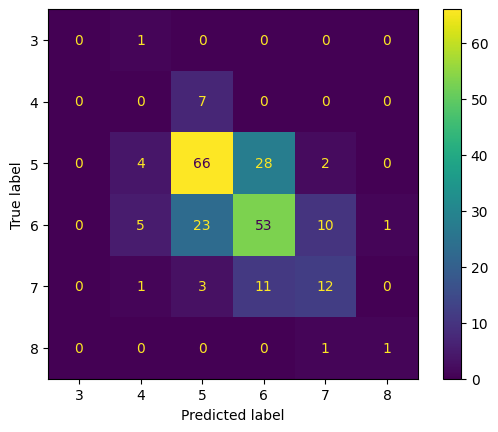

In [92]:
print("Test Test : ", metrics.accuracy_score(y_test,y_predict))
ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

akurasi_score = accuracy_score(y_test, y_predict)

print("akurasi= ",akurasi_score)

# Visualisasi Decision Tree

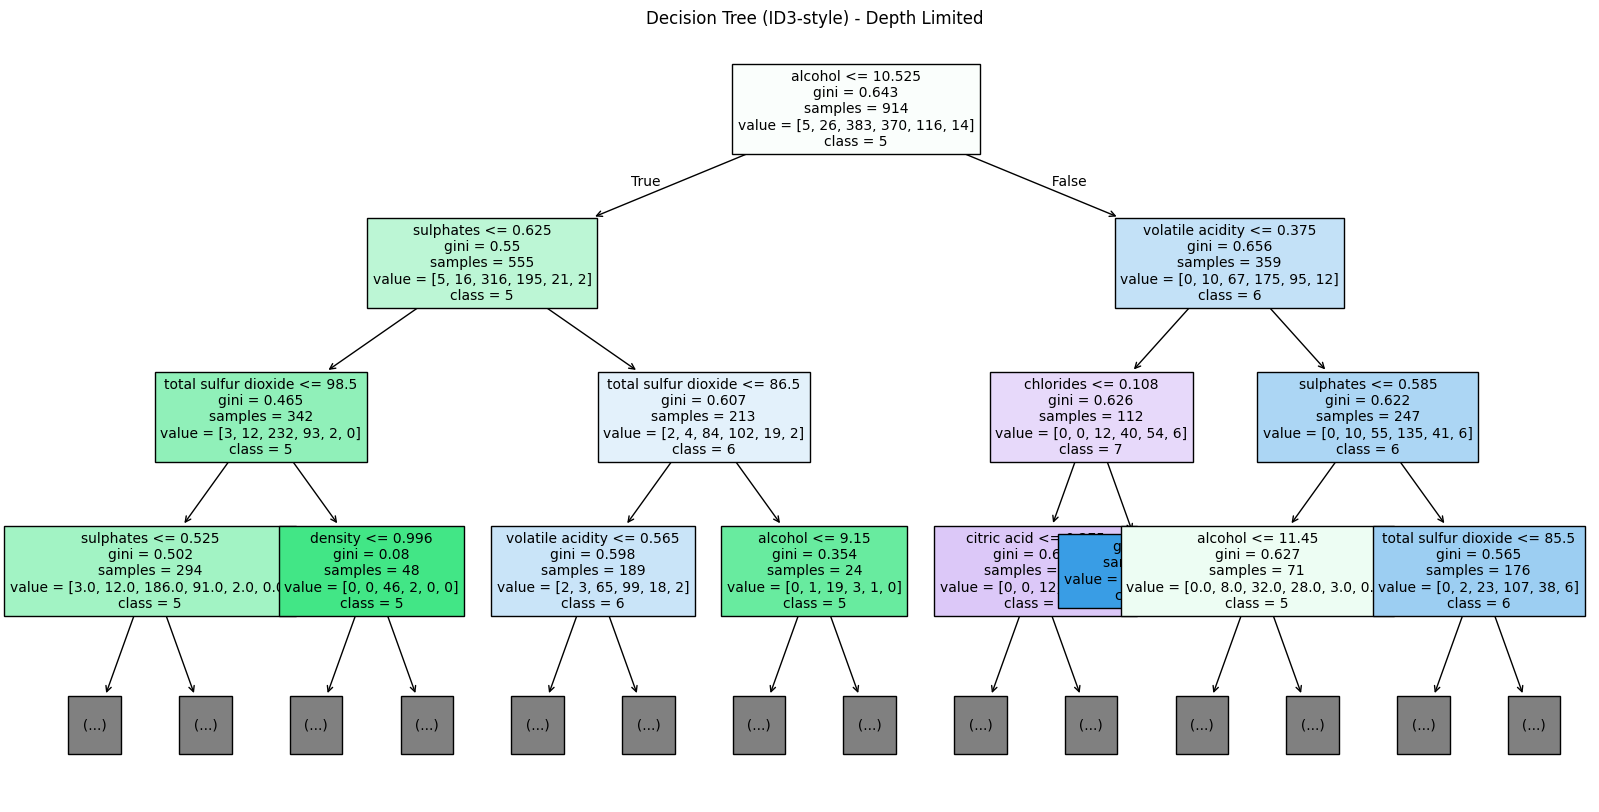

In [93]:
plt.figure(figsize=(20, 10))
plot_tree(
    tree_clf,
    max_depth=3,  # hanya tampilkan depth 0, 1, 2 (3 level)
    feature_names=x.columns,
    class_names=[str(c) for c in sorted(y.unique())],
    filled=True,
    fontsize=10
)
plt.title("Decision Tree (ID3-style) - Depth Limited")
plt.show()

In [94]:


# Simpan dengan pickle
with open('id3_wine_model.pkl', 'wb') as f:
    pickle.dump(tree_clf, f)

# Muat dengan pickle

with open('id3_wine_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    

# Simpan akurasi ID3
with open('id3_accuracy.pkl', 'wb') as f:
    pickle.dump(float(akurasi_score), f)
    